# Data Source:

This dataset is based on "Bank Marketing" UCI dataset (donated 2012): http://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

Citation: S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

Bank-additional-full.csv is used in this study. This dataset contains info for bank marketing enriched with social and economic features from a ~10M population in Portugal from May 2008 to Nov 2010. 

There is ~41.2k instances with 21 attributes. Description of attributes as below: 

**Attributes Info:**

**Bank client data:**

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**

Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). 

Important note: Duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**

Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

y - has the client subscribed a term deposit? (binary: 'yes', 'no')


# References: 

https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit/notebook 

https://www.kaggle.com/code/jaimebecerraguerrero/bank-marketing-data-analysis-eda-0-9-score 

https://www.kaggle.com/code/benroshan/bank-marketing-campaign-predictive-analytics 

https://www.kaggle.com/code/henriqueyamahata/bank-marketing-classification-roc-f1-recall

https://en.wikipedia.org/wiki/Education_in_Portugal#Years_of_schooling

# Part 1. Exploratory Data Analysis (EDA)¶
In EDA, we explore and visualize the data to gain insights into its distribution, patterns, and potential issues such as class imbalance. EDA helps us to understand the characteristics of the dataset and identify any preprocessing steps that might be needed.

In this study, preliminary data processing starts earlier at EDA, e.g. renaming columns, standardization of values with known hierarchy is carried out for ease of analysis interpretation. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading data
df_eda = pd.read_csv('./DATA/bank-additional-full.csv',sep ="\;") 
df_eda

,"""age""","""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [3]:
# Remove double quotes from column names
df_eda.columns = df_eda.columns.str.replace('"', '')

# Replace double quotes with an empty string in all values (can be used in the absence of object dtypes in dataset)
#df_eda = df_eda.applymap(lambda x: x.replace('"', ''))

# Find columns with object data type (strings)
object_columns = df_eda.select_dtypes(include=['object']).columns

# Remove both double quotes and periods from object type columns
df_eda[object_columns] = df_eda[object_columns].apply(lambda x: x.str.replace(r'["".]', '', regex=True))

In [4]:
# Define the new column names for clarity
new_column_names = ['age', 'job', 'marital', 'education', 'creditdefault', 'housingloan', 'personalloan',
       'contacttype', 'month', 'day', 'duration', 'contactfreq', 'pdays',
       'previous', 'poutcome', 'empvarrate', 'cpi',
       'cci', 'euribor3m', 'staffavail', 'fdsubscrip']

# Assign the new column names to the DataFrame
df_eda.columns = new_column_names
df_eda.head() 

,age,job,marital,education,creditdefault,housingloan,personalloan,contacttype,month,day,...,contactfreq,pdays,previous,poutcome,empvarrate,cpi,cci,euribor3m,staffavail,fdsubscrip
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,highschool,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,highschool,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,highschool,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  object 
 2   marital        41188 non-null  object 
 3   education      41188 non-null  object 
 4   creditdefault  41188 non-null  object 
 5   housingloan    41188 non-null  object 
 6   personalloan   41188 non-null  object 
 7   contacttype    41188 non-null  object 
 8   month          41188 non-null  object 
 9   day            41188 non-null  object 
 10  duration       41188 non-null  int64  
 11  contactfreq    41188 non-null  int64  
 12  pdays          41188 non-null  int64  
 13  previous       41188 non-null  int64  
 14  poutcome       41188 non-null  object 
 15  empvarrate     41188 non-null  float64
 16  cpi            41188 non-null  float64
 17  cci            41188 non-null  float64
 18  euribo

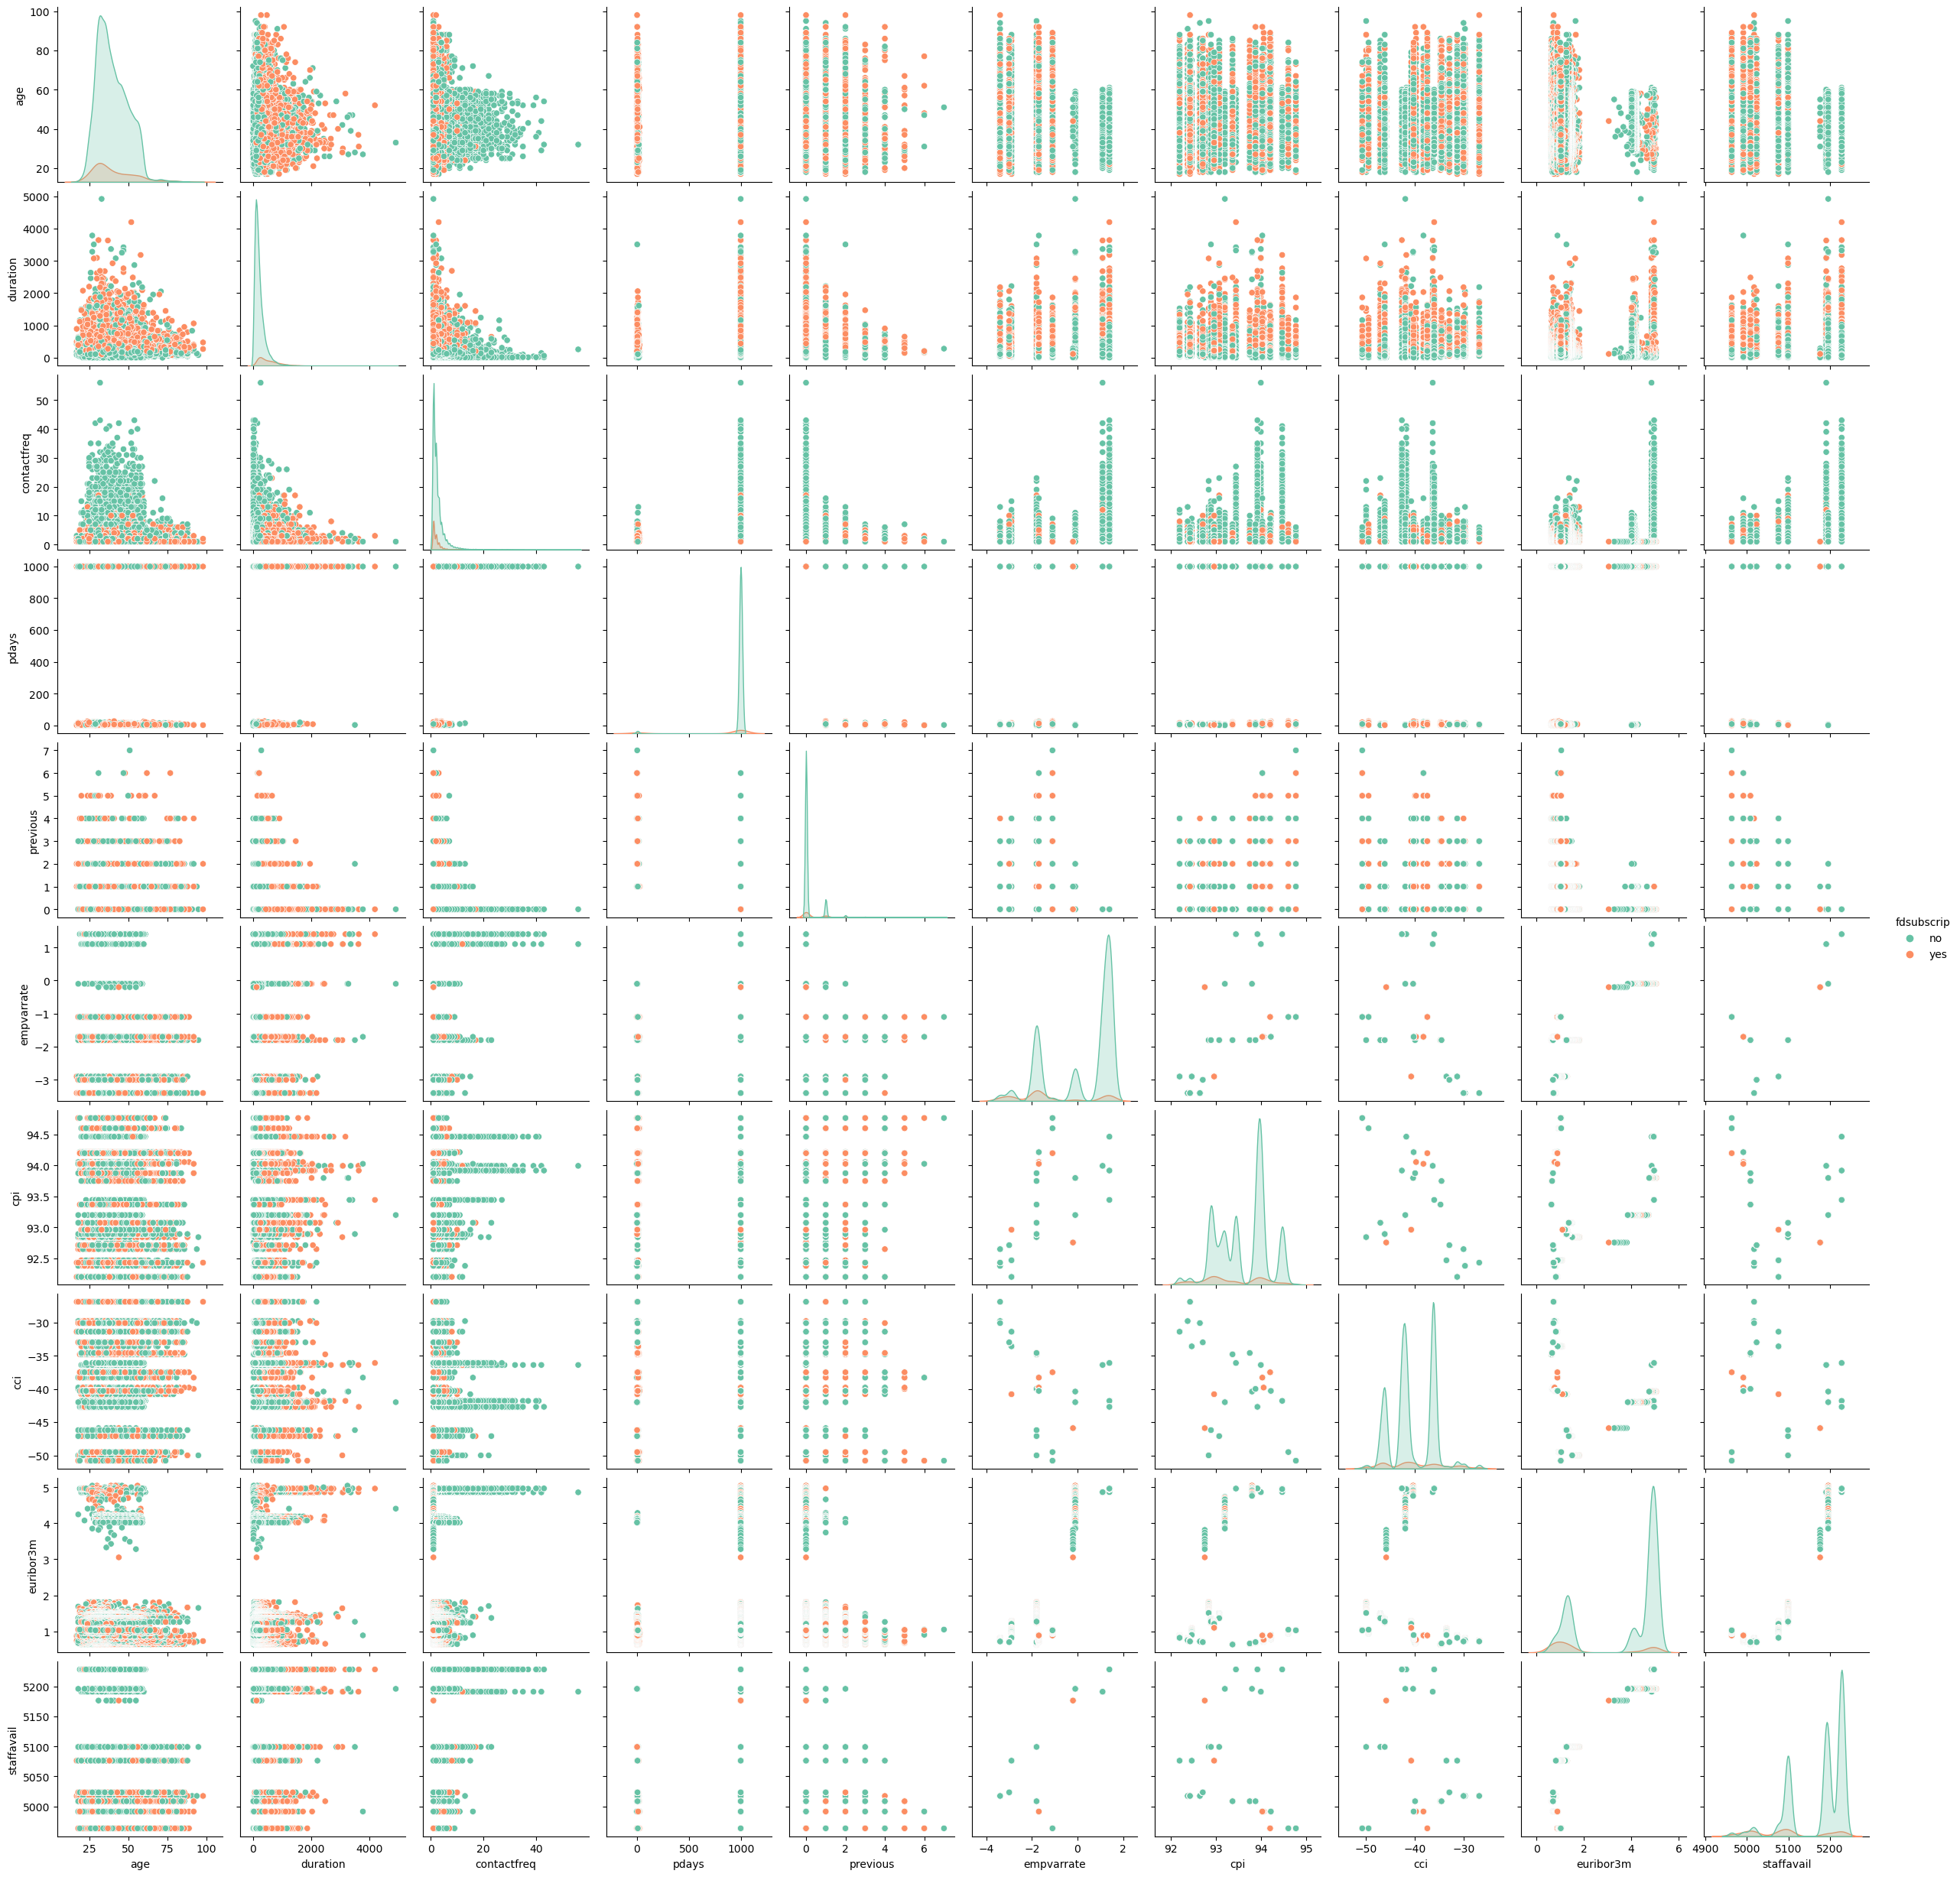

CPU times: total: 3min 30s
Wall time: 3min 49s


In [7]:
%%time
sns.pairplot(df_eda, hue='fdsubscrip', palette="Set2")
plt.show()

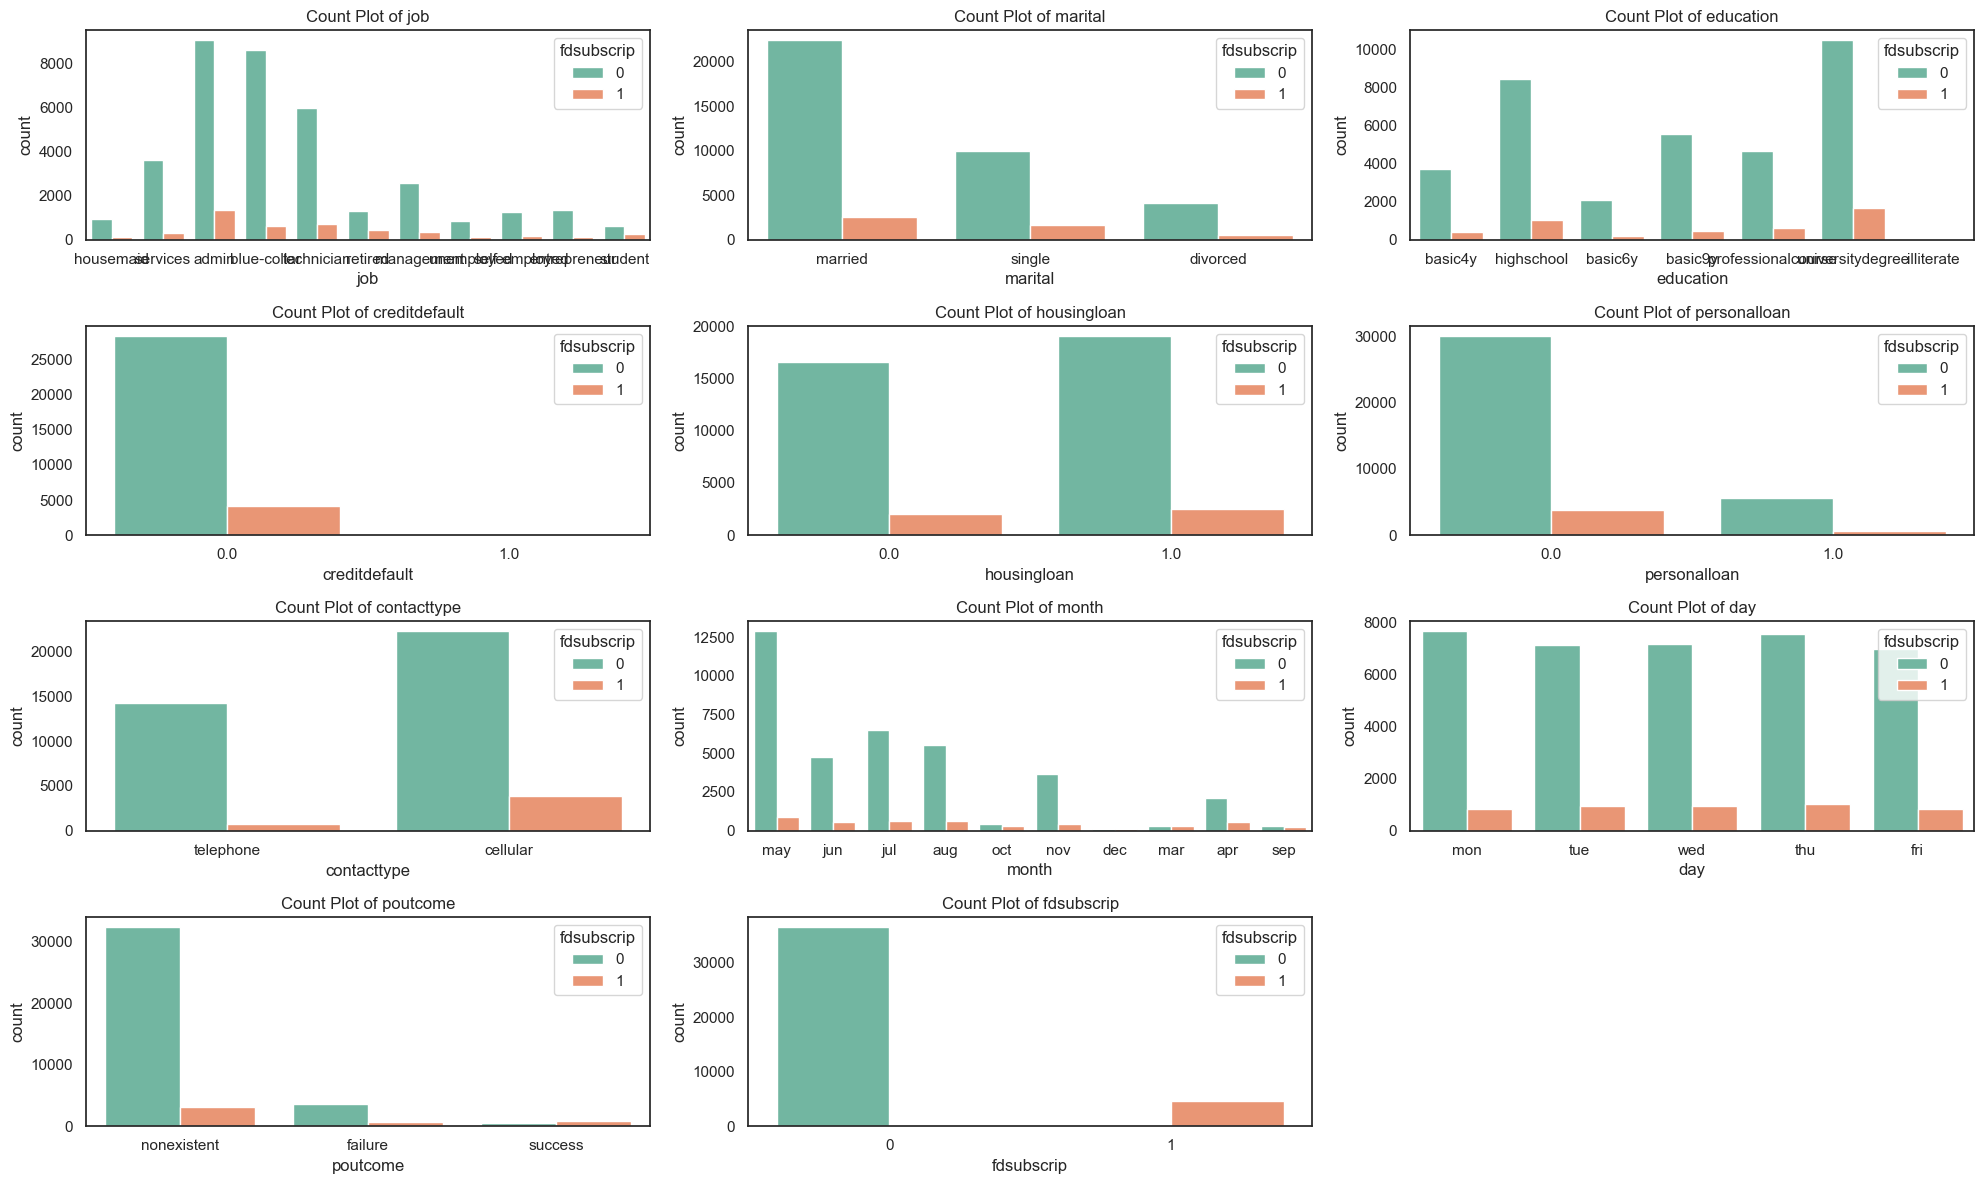

In [23]:
#Quick look at categorical attributes distribution

# Define the list of categorical columns
categorical_columns = ['job', 'marital', 'education', 'creditdefault', 'housingloan',
                       'personalloan', 'contacttype', 'month', 'day', 'poutcome', 'fdsubscrip']

# Set the color palette to "Set2"
sns.set_palette("Set2")

# Create subplots for categorical attributes (count plots)
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=col, data=df_eda, hue='fdsubscrip')
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

In [5]:
# Replace 'unknown' with NaN, 'yes' with 1, and 'no' with 0
df_eda.replace({'unknown': np.nan, 'yes': 1, 'no': 0}, inplace=True)

In [10]:
df_eda.isnull().sum()

age                 0
job               330
marital            80
education        1731
creditdefault    8597
housingloan       990
personalloan      990
contacttype         0
month               0
day                 0
duration            0
contactfreq         0
pdays               0
previous            0
poutcome            0
empvarrate          0
cpi                 0
cci                 0
euribor3m           0
staffavail          0
fdsubscrip          0
dtype: int64

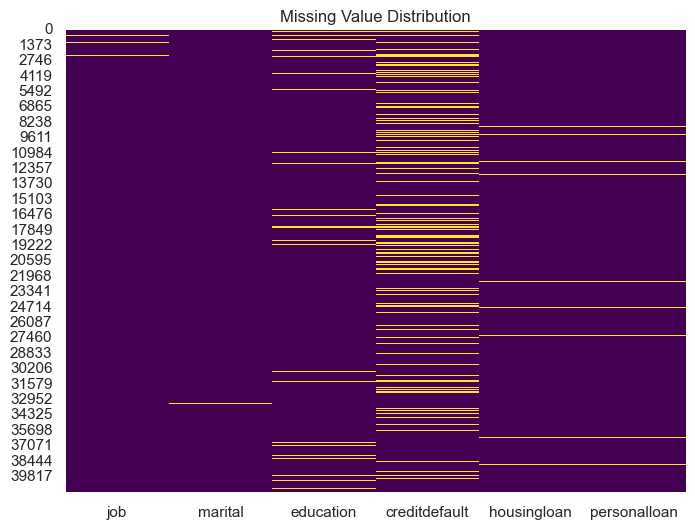

In [22]:
#Check distribution of NAN values 

# Plot the missing value distribution
plt.figure(figsize=(8, 6))
sns.heatmap(df_eda[['job', 'marital', 'education', 'creditdefault', 'housingloan', 'personalloan']].isnull(), cmap='viridis', cbar=False)
plt.title('Missing Value Distribution')
plt.show()

Approx. 31% of dataset have null values, which appears to be randomly distributed. As the null values are from categorical data, can consider doing mode imputation.

In [11]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
creditdefault,32591.0,0.000092,0.009594,0.000,0.000,0.000,0.000,1.000
housingloan,40198.0,0.536743,0.498654,0.000,0.000,1.000,1.000,1.000
personalloan,40198.0,0.155431,0.362319,0.000,0.000,0.000,0.000,1.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
contactfreq,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
empvarrate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cpi,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767


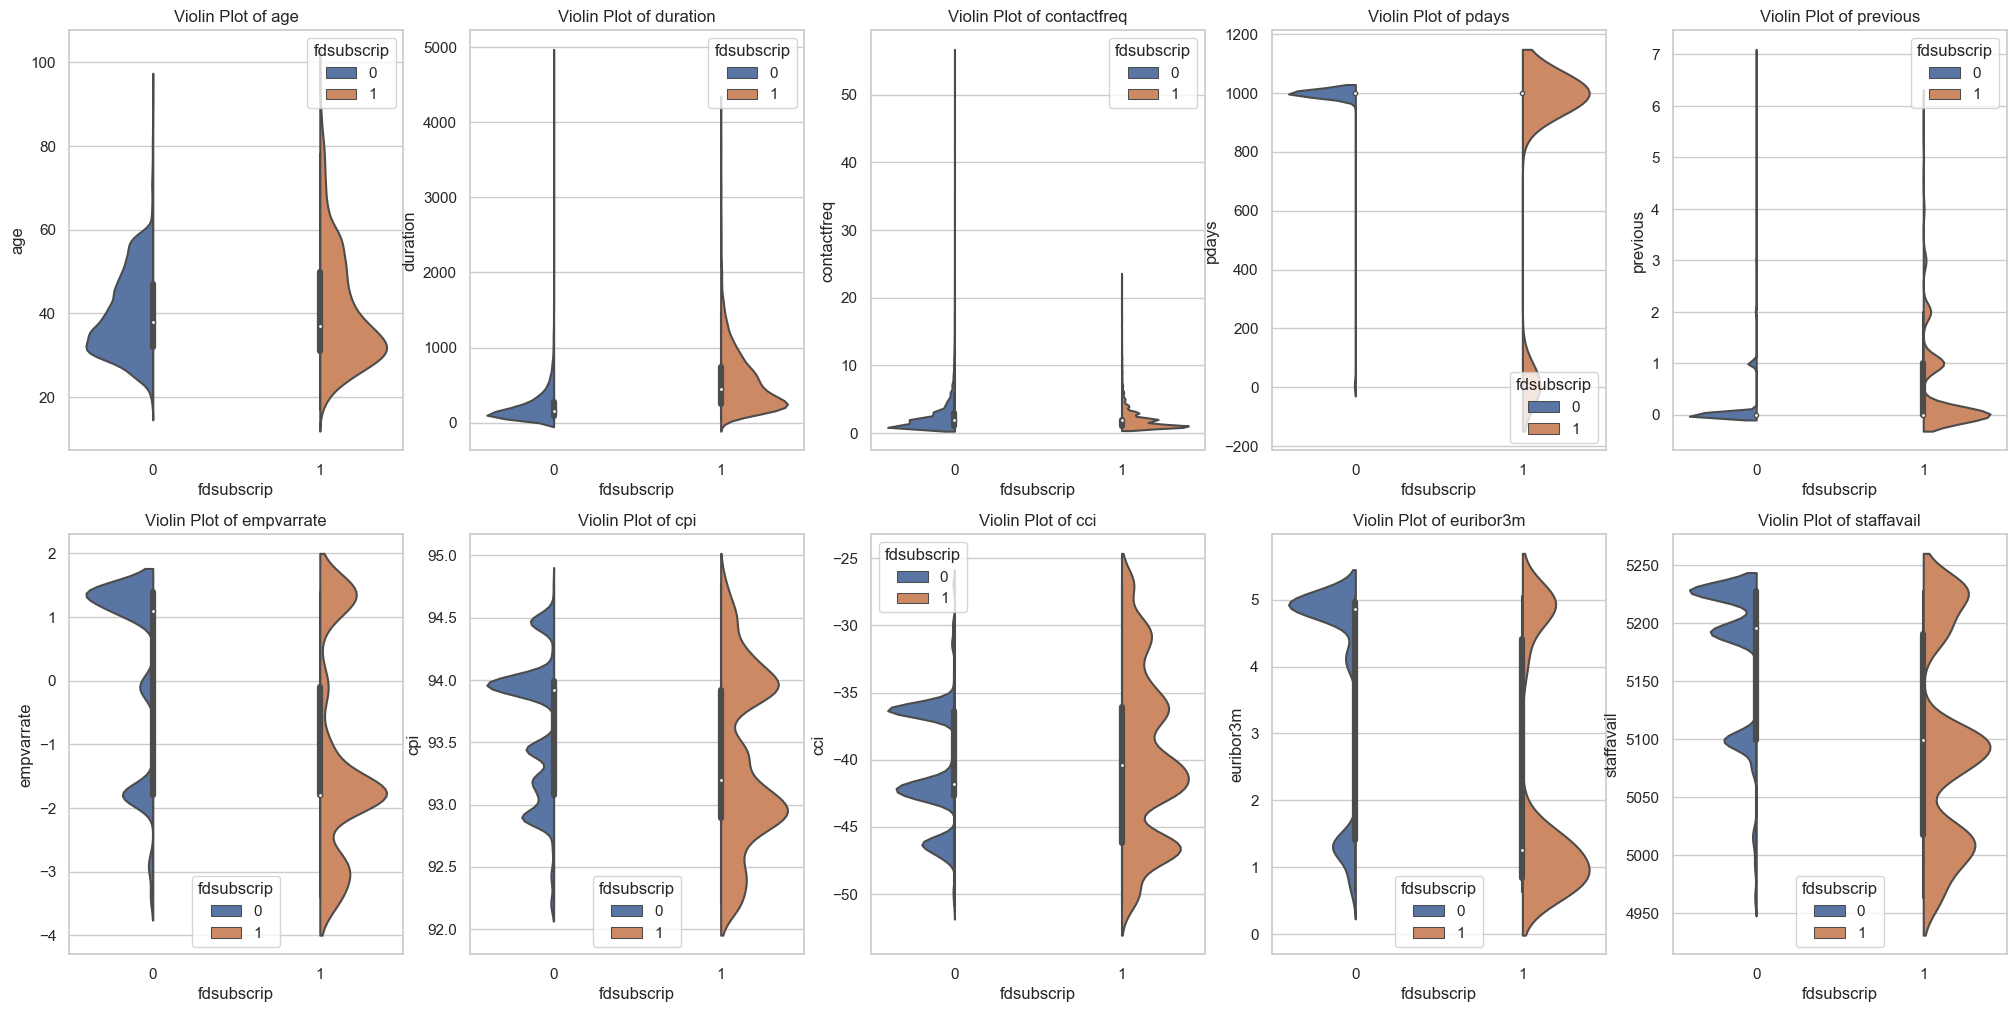

In [54]:
# Identifying outliers

# Define the list of numerical and categorical columns
numerical_columns = ['age', 'duration', 'contactfreq', 'pdays', 'previous',
                     'empvarrate', 'cpi', 'cci', 'euribor3m', 'staffavail']

# Create subplots for numerical attributes (violin plots)
plt.figure(figsize=(25, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.violinplot(x='fdsubscrip', y=col, data=df_eda, hue='fdsubscrip', split=True)
    plt.title(f'Violin Plot of {col}')

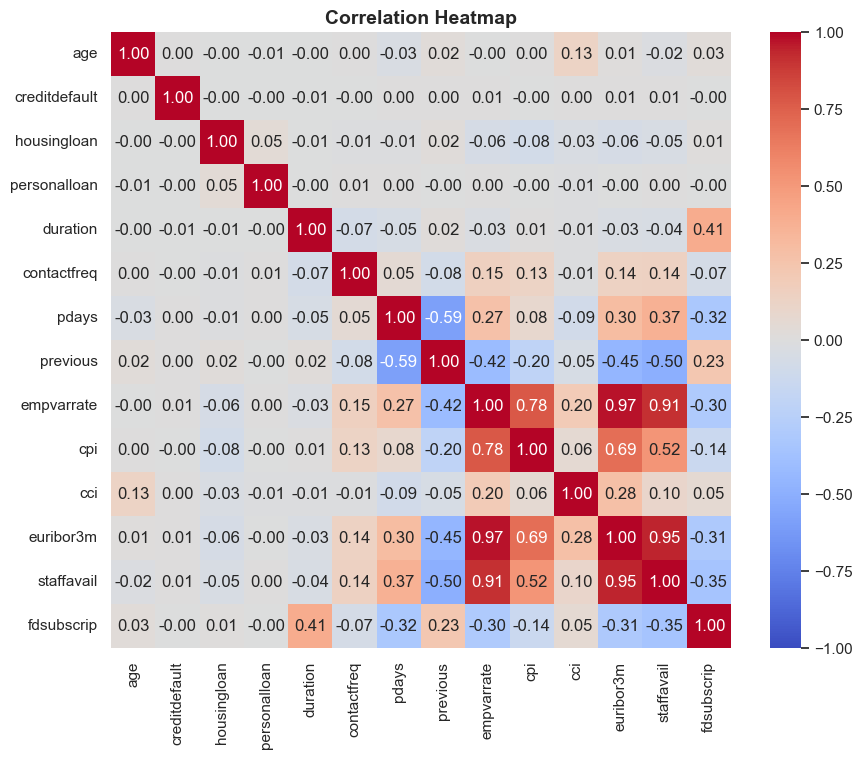

In [19]:
# Calculate the correlation matrix
corr_matrix = df_eda.corr()

# Set the style of the heatmap
sns.set(style="white")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

# Set the title
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

Overall, numerical features are weakly correlated to FD subscription as the highest attribute 'duration' is 0.41.

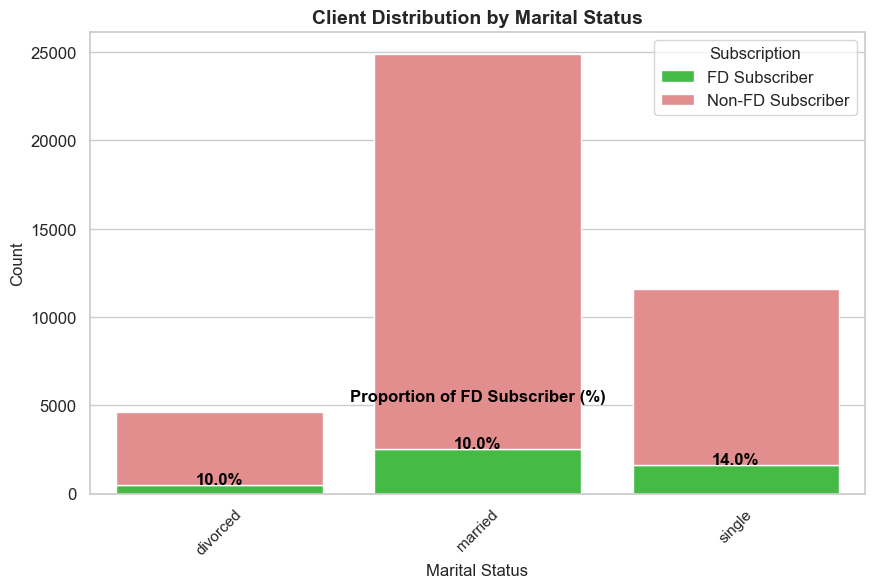

In [6]:
#Investigate proportion of FD subscriber according to marital status

# Group the data by 'marital' and calculate the count of FD subscriber
fd_by_marital = df_eda.groupby('marital')['fdsubscrip'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the sum of counts for each marital status with fdsubscrip == 0 and fdsubscrip == 1
sum_counts_fd0 = fd_by_marital[0].tolist()
sum_counts_fd1 = fd_by_marital[1].tolist()

# Calculate the total count of clients in each marital status
marital_totals = fd_by_marital[[0, 1]].sum(axis=1)

# Calculate the percentage of fdsubscrip == 1 out of marital status
percentage_fd1 = round((fd_by_marital[1] / marital_totals) * 100, 0)

# Set the style to Seaborn's style
sns.set(style="whitegrid")

# Create a bar chart using Seaborn with explicit palette colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='marital', y=1, data=fd_by_marital, palette=['#32CD32'], order=fd_by_marital['marital'], label='FD Subscriber')
sns.barplot(x='marital', y=0, data=fd_by_marital, palette=['#f08080'], order=fd_by_marital['marital'], label='Non-FD Subscriber', bottom=fd_by_marital[1])

plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Client Distribution by Marital Status', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Subscription', fontsize=12)

# Add y-value labels for fdsubscrip==1 as percentages
for p, label in zip(ax.patches, percentage_fd1):
    ax.annotate(f'{label}%', (p.get_x() + p.get_width() / 2., p.get_height()+300),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')
    
# Add the text above the y-value labels
plt.text(0.5, 0.2, 'Proportion of FD Subscriber (%)', transform=ax.transAxes, fontsize=12, ha='center', weight='bold', color='black')

plt.show()

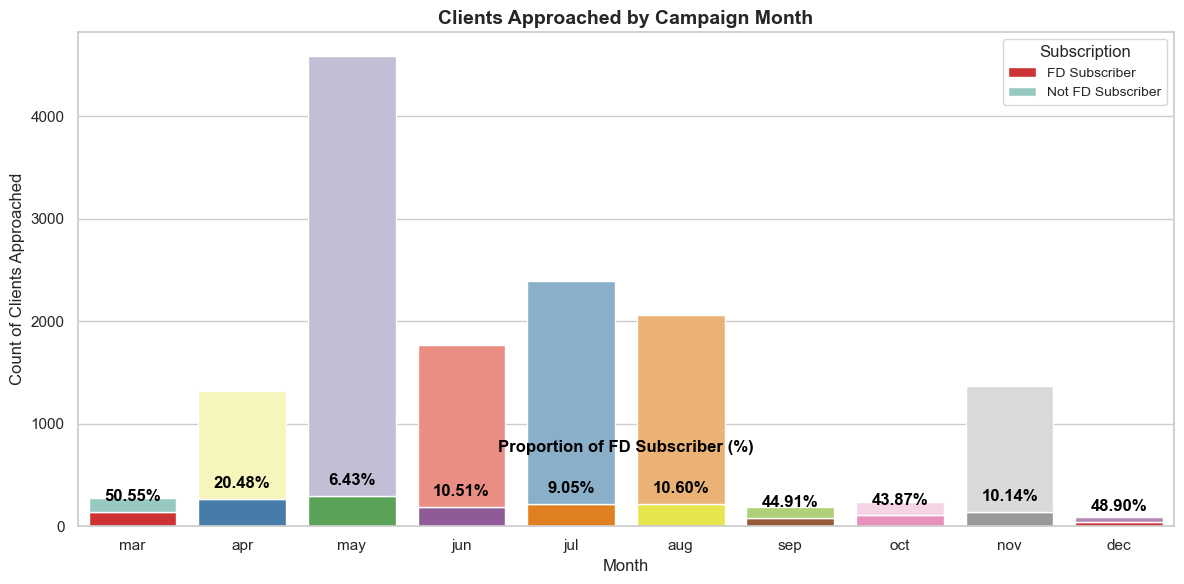

In [35]:
#Standardization of instances occurence to 1 cycle

# Group the data by 'month' and calculate the count of clients approached for both FD subscribers (fdsubscrip == 1 and fdsubscrip == 0)
clients_by_month = df_eda.groupby('month')['fdsubscrip'].value_counts().unstack(fill_value=0).reset_index()

# Standardize the count for May to November (3x occurrence)
for month in ['may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov']:
    clients_by_month.loc[clients_by_month['month'] == month, 1] /= 3
    clients_by_month.loc[clients_by_month['month'] == month, 0] /= 3

# Standardize the count for December to April (2x occurrence)
for month in ['dec', 'jan', 'feb', 'mar', 'apr']:
    clients_by_month.loc[clients_by_month['month'] == month, 1] /= 2
    clients_by_month.loc[clients_by_month['month'] == month, 0] /= 2

# Sort the DataFrame by the standardized count of FD subscribers in descending order
clients_by_month = clients_by_month.sort_values(by=0, ascending=False)

# Calculate the sum of counts for fdsubscrip == 0 and fdsubscrip == 1 according to month
clients_by_month['Total'] = clients_by_month[0] + clients_by_month[1]

# Calculate the percentage of fdsubscrip == 1 by month
clients_by_month['Percentage_FD1'] = (clients_by_month[1] / clients_by_month['Total']) * 100

# Define a custom order for months
custom_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the 'month' column to a categorical data type with the custom order
clients_by_month['month'] = pd.Categorical(clients_by_month['month'], categories=custom_order, ordered=True)

# Sort the DataFrame by the 'month' column
clients_by_month = clients_by_month.sort_values(by='month')

# Set the style to Seaborn's style
sns.set(style="whitegrid")

# Create a bar chart to visualize the standardized count of FD subscribers by month
plt.figure(figsize=(12, 6))

# Create the bar chart for clients approached by month
ax = sns.barplot(x='month', y=1, data=clients_by_month, palette='Set1', label='FD Subscriber')
sns.barplot(x='month', y=0, data=clients_by_month, palette='Set3', label='Not FD Subscriber', bottom=clients_by_month[1])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Clients Approached', fontsize=12)
plt.title('Clients Approached by Campaign Month', fontweight='bold', fontsize=14)
plt.legend(title='Subscription', fontsize=10, title_fontsize=12)

# Add y-value labels for fdsubscrip==1 as percentages
percentage_fd1 = clients_by_month['Percentage_FD1']
for p, label in zip(ax.patches, percentage_fd1):
    ax.annotate(f'{label:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()+150),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Add the text above the y-value labels
plt.text(0.5, 0.15, 'Proportion of FD Subscriber (%)', transform=ax.transAxes, fontsize=12, ha='center', weight='bold', color='black')

# Show the plot
plt.tight_layout()
plt.show()

Between the dataset collection period, some months occurs 3x, some 2x. Dataset is standardised to 1x for a more accurate interpretation. Result: FD % Subscription is higher in March, April, Sept, Oct and Dec. 

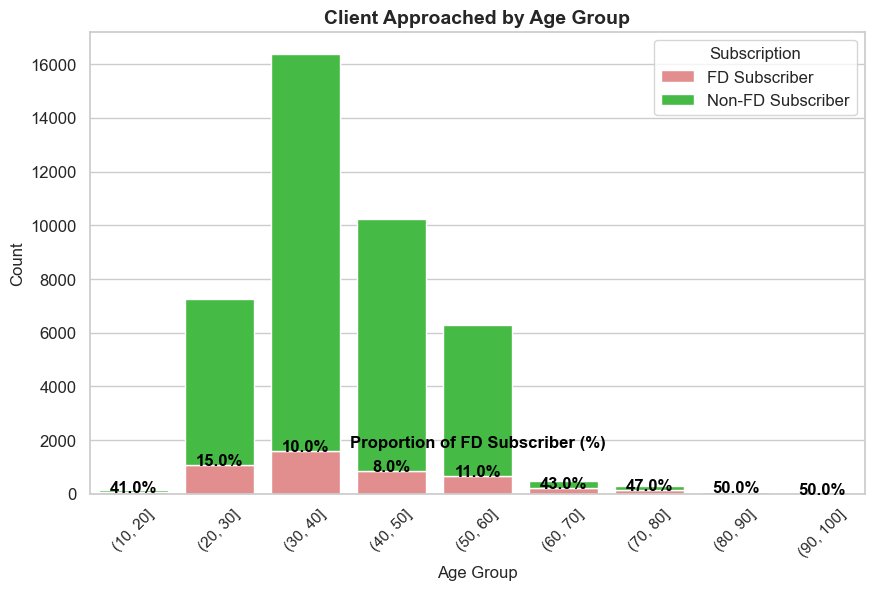

In [40]:
#Investigate proportion of FD subscriber according to age group

# Define the age bins
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Convert the 'age' column into categorical data with the specified bins
df_eda['age_group'] = pd.cut(df_eda['age'], bins=age_bins)

# Group data by 'age_group' and 'fdsubscrip' and calculate the count of clients approached
fd_by_age = df_eda.groupby(['age_group', 'fdsubscrip']).size().unstack(fill_value=0).reset_index()

# Group data by 'age_group' and 'fdsubscrip' and calculate the count of clients approached
age_group_counts = fd_by_age

# Calculate the sum of counts for each age bin with fdsubscrip == 0 and fdsubscrip == 1
sum_counts_fd0 = age_group_counts[0].tolist()
sum_counts_fd1 = age_group_counts[1].tolist()

# Calculate the total count of clients in each age group
age_group_totals = age_group_counts[[0, 1]].sum(axis=1)

# Calculate the percentage of fdsubscrip == 1 out of the age bins
percentage_fd1 = round((age_group_counts[1] / age_group_totals) * 100,0)

# Set the style to Seaborn's style
sns.set(style="whitegrid")

# Create a bar chart using Seaborn with explicit palette colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='age_group', y=1, data=fd_by_age, palette=['#f08080'], order=fd_by_age['age_group'], label='FD Subscriber')
sns.barplot(x='age_group', y=0, data=fd_by_age, palette=['#32CD32'], order=fd_by_age['age_group'], label='Non-FD Subscriber', bottom=fd_by_age[1])

plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Client Approached by Age Group', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Subscription', fontsize=12)

# Add y-value labels for fdsubscrip==1 as percentages
for p, label in zip(ax.patches, percentage_fd1):
    ax.annotate(f'{label}%', (p.get_x() + p.get_width() / 2., p.get_height()+150),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')
    
# Add the text above the y-value labels
plt.text(0.5, 0.1, 'Proportion of FD Subscriber (%)', transform=ax.transAxes, fontsize=12, ha='center', weight='bold', color='black')

plt.show()

In [38]:
#Simulating percentage of FD subscription success according to age group (50 random sampling) of the same sample size 

# Define the age bins
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Convert the 'age' column into categorical data with the specified bins
df_eda['age_group'] = pd.cut(df_eda['age'], bins=age_bins)

# Create a DataFrame to store the results
results = []

# Specify the sample size for each age group
sample_size = 10 #the minimum required to include age group 90-100

# Specify the number of iterations
num_iterations = 50

# Perform the iterations
for iteration in range(num_iterations):
    # Iterate through each age group
    for age_group, group_data in df_eda.groupby('age_group'):
        # Randomly sample 'sample_size' records from each age group with a different random state
        if len(group_data) >= sample_size:
            random_subset = group_data.sample(n=sample_size, random_state=iteration)
            
            # Calculate the percentage of fdsubscrip == 1 within the random subset
            percentage_fd1 = (random_subset['fdsubscrip'] == 1).mean() * 100
            
            # Append the result to the results list
            results.append({
                'Age Group': age_group,
                'Sample Size': sample_size,
                'FD Subscriber (%)': percentage_fd1
            })

# Create a DataFrame from the results list
result_df = pd.DataFrame(results)

# Calculate the average percentage across iterations for each age group
average_percentage = result_df.groupby('Age Group')['FD Subscriber (%)'].mean().reset_index()

# Display the average result DataFrame
print('Simulation of FD Subscriber Success Rate (%) from 50 Random Sampling')
print('-' * 70)
print(average_percentage)

Simulation of FD Subscriber Success Rate (%) from 50 Random Sampling
----------------------------------------------------------------------
   Age Group  FD Subscriber (%)
0   (10, 20]               41.0
1   (20, 30]               17.8
2   (30, 40]                9.6
3   (40, 50]                9.2
4   (50, 60]               10.2
5   (60, 70]               39.8
6   (70, 80]               45.4
7   (80, 90]               52.2
8  (90, 100]               50.0


Students (17 to 20 years old) and retiree (60 years old >) show highest rate of FD subscription (~30% higher). To ascertain result initial findings is not due to small sample, simulation is done using same sample size and the simulation outcome is consistent with initial findings. 

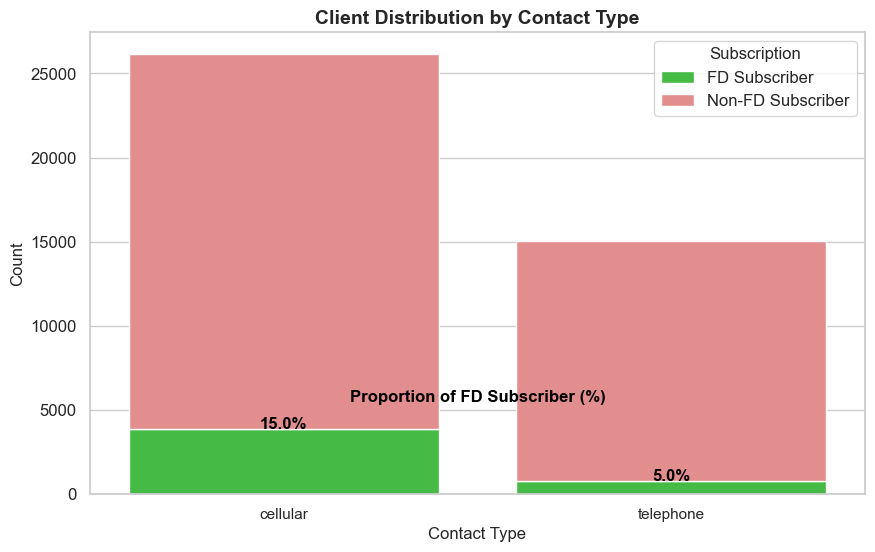

In [46]:
#Investigate proportion of FD subscriber according to contact type

# Group the data by 'contacttype' and calculate the count of FD subscribers for both 1 and 0
fd_by_contacttype = df_eda.groupby('contacttype')['fdsubscrip'].value_counts().unstack(fill_value=0).reset_index()

# Calculate the sum of counts for each contact type with fdsubscrip == 0 and fdsubscrip == 1
sum_counts_fd0 = fd_by_contacttype[0].tolist()
sum_counts_fd1 = fd_by_contacttype[1].tolist()

# Calculate the total count of clients in each contact type
contacttype_totals = fd_by_contacttype[[0, 1]].sum(axis=1)

# Calculate the percentage of fdsubscrip == 1 out of contact type
percentage_fd1 = round((fd_by_contacttype[1] / contacttype_totals) * 100, 0)

# Set the style to Seaborn's style
sns.set(style="whitegrid")

# Create a bar chart using Seaborn with explicit palette colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='contacttype', y=1, data=fd_by_contacttype, palette=['#32CD32'], order=fd_by_contacttype['contacttype'], label='FD Subscriber')
sns.barplot(x='contacttype', y=0, data=fd_by_contacttype, palette=['#f08080'], order=fd_by_contacttype['contacttype'], label='Non-FD Subscriber', bottom=fd_by_contacttype[1])

plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Client Distribution by Contact Type', fontweight='bold', fontsize=14)
#plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Subscription', fontsize=12)

# Add y-value labels for fdsubscrip==1 as percentages
for p, label in zip(ax.patches, percentage_fd1):
    ax.annotate(f'{label}%', (p.get_x() + p.get_width() / 2., p.get_height()+300),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')
    
# Add the text above the y-value labels
plt.text(0.5, 0.2, 'Proportion of FD Subscriber (%)', transform=ax.transAxes, fontsize=12, ha='center', weight='bold', color='black')

plt.show()

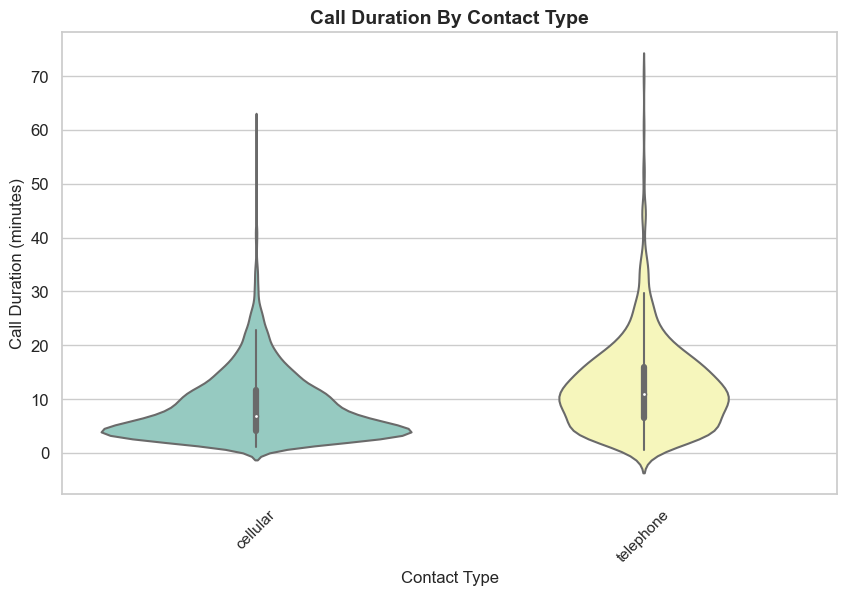

In [55]:
#Investigate relationship of contact type to call duration

# Filter the DataFrame for FD subscribers (fdsubscrip == 1)
fd_subscribers_df = df_eda[df_eda['fdsubscrip'] == 1]

# Convert call duration from seconds to minutes
fd_subscribers_df['duration_minutes'] = fd_subscribers_df['duration'] / 60

# Set the style to Seaborn's style
sns.set(style="whitegrid")

# Define the desired order of categories on the x-axis
desired_order = ['cellular','telephone']

# Create a violin plot to compare call durations between contact types for FD subscribers
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='contacttype', y='duration_minutes', data=fd_subscribers_df, palette='Set3', order=desired_order)

plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Call Duration (minutes)', fontsize=12)
plt.title('Call Duration By Contact Type', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)

plt.show()

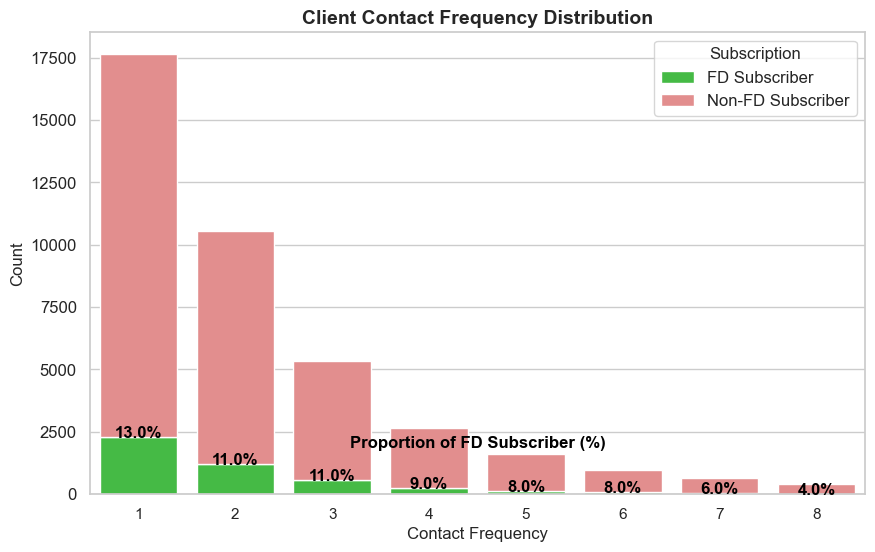

In [47]:
# Filter the data to include only contact frequencies up to 8
fd_by_contactfreq = df_eda.groupby('contactfreq')['fdsubscrip'].value_counts().unstack(fill_value=0).reset_index()
fd_by_contactfreq_filtered = fd_by_contactfreq[fd_by_contactfreq['contactfreq'].isin([1, 2, 3, 4, 5, 6, 7, 8])]

# Calculate the sum of counts for contact freq with fdsubscrip == 0 and fdsubscrip == 1
sum_counts_fd0 = fd_by_contactfreq_filtered[0].tolist()
sum_counts_fd1 = fd_by_contactfreq_filtered[1].tolist()

# Calculate the total count of clients by contact freq 
contactfreq_totals = fd_by_contactfreq_filtered[[0, 1]].sum(axis=1)

# Calculate the percentage of fdsubscrip == 1 out of contact freq 
percentage_fd1 = round((fd_by_contactfreq_filtered[1] / contactfreq_totals) * 100, 0)

# Set the style to Seaborn's style
sns.set(style="whitegrid")

# Create a bar chart using Seaborn with explicit palette colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='contactfreq', y=1, data=fd_by_contactfreq_filtered, palette=['#32CD32'], order=fd_by_contactfreq_filtered['contactfreq'], label='FD Subscriber')
sns.barplot(x='contactfreq', y=0, data=fd_by_contactfreq_filtered, palette=['#f08080'], order=fd_by_contactfreq_filtered['contactfreq'], label='Non-FD Subscriber', bottom=fd_by_contactfreq_filtered[1])

plt.xlabel('Contact Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Client Contact Frequency Distribution', fontweight='bold', fontsize=14)
#plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Subscription', fontsize=12)

# Add y-value labels for fdsubscrip==1 as percentages
for p, label in zip(ax.patches, percentage_fd1):
    ax.annotate(f'{label}%', (p.get_x() + p.get_width() / 2., p.get_height()+150),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')
    
# Add the text above the y-value labels
plt.text(0.5, 0.1, 'Proportion of FD Subscriber (%)', transform=ax.transAxes, fontsize=12, ha='center', weight='bold', color='black')

plt.show()

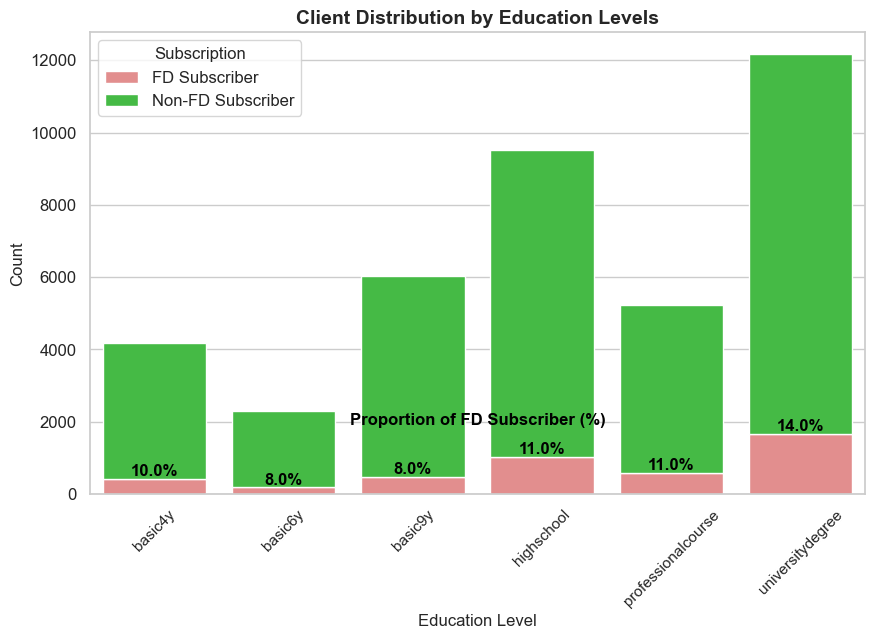

In [57]:
#Investigate proportion of FD subscriber according to education level

# Filter out rows where education is 'illiterate'
fd_by_education = df_eda.groupby('education')['fdsubscrip'].value_counts().unstack(fill_value=0).reset_index()
fd_by_education_filtered = fd_by_education[fd_by_education['education'] != 'illiterate']

# Calculate the sum of counts for each education level with fdsubscrip == 0 and fdsubscrip == 1
sum_counts_fd0 = fd_by_education_filtered[0].tolist()
sum_counts_fd1 = fd_by_education_filtered[1].tolist()

# Calculate the total count of clients in each education level
education_totals = fd_by_education_filtered[[0, 1]].sum(axis=1)

# Calculate the percentage of fdsubscrip == 1 out of education level
percentage_fd1 = round((fd_by_education_filtered[1] / education_totals) * 100, 0)

# Set the style to Seaborn's style
sns.set(style="whitegrid")

# Create a bar chart using Seaborn with explicit palette colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='education', y=1, data=fd_by_education_filtered, palette=['#f08080'], order=fd_by_education_filtered['education'], label='FD Subscriber')
sns.barplot(x='education', y=0, data=fd_by_education_filtered, palette=['#32CD32'], order=fd_by_education_filtered['education'], label='Non-FD Subscriber', bottom=fd_by_education_filtered[1])

plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Client Distribution by Education Levels', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Subscription', fontsize=12)

# Add y-value labels for fdsubscrip==1 as percentages
for p, label in zip(ax.patches, percentage_fd1):
    ax.annotate(f'{label}%', (p.get_x() + p.get_width() / 2., p.get_height()+200),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')
    
# Add the text above the y-value labels
plt.text(0.5, 0.15, 'Proportion of FD Subscriber (%)', transform=ax.transAxes, fontsize=12, ha='center', weight='bold', color='black')

plt.show()

Refer presentation slide for insights gained that is not explained in the notebook.

# Step 2. Data Pre-processing

As per EDA findings, feature engineering will be carried out on features that show significant difference for FD subscription, e.g marital status, contact type. Other categorical feature will be converted to numerical values through mapping and One Hot Encoding (dummies). Outliers in this study will be kept as it may be important for model training.  

Model(classifier) selection for machine learning in this study is based on algorithm robustness against features outliers and imbalance dataset. In this study, we will be using the following: 

1. HistGBoost, Histogram Gradient Boosting (able to handle missing values, robust against outliers and imbalance)

2. XGBoost, Extreme Gradient Boosting (able to handle missing values & class imbalance (via scale_pos_weight and max_delta_step), robust against outliers and imbalance) 

3. RandomForest Classifier (require NAN values processing, robust against outliers and imbalance)

Multiple dataset version will be save for model training as above.

In [41]:
df_dp = df_eda.copy()
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            41188 non-null  int64   
 1   job            40858 non-null  object  
 2   marital        41108 non-null  object  
 3   education      39457 non-null  object  
 4   creditdefault  32591 non-null  float64 
 5   housingloan    40198 non-null  float64 
 6   personalloan   40198 non-null  float64 
 7   contacttype    41188 non-null  object  
 8   month          41188 non-null  object  
 9   day            41188 non-null  object  
 10  duration       41188 non-null  int64   
 11  contactfreq    41188 non-null  int64   
 12  pdays          41188 non-null  int64   
 13  previous       41188 non-null  int64   
 14  poutcome       41188 non-null  object  
 15  empvarrate     41188 non-null  float64 
 16  cpi            41188 non-null  float64 
 17  cci            41188 non-null  

In [42]:
# Define a function to assign values based on marital status
def assign_marital_value(status):
    if status == 'single':
        return 1
    else:
        return 0

# Apply the function to create the new column 'marital_category'
df_dp['marital_category'] = df_dp['marital'].apply(assign_marital_value)

In [43]:
# Define a function to assign values based on contact type
def assign_contact_type_value(contact_type):
    if contact_type == 'cellular':
        return 1
    elif contact_type == 'telephone':
        return 0
    else:
        return None 

# Apply the function to create the new column 'contact_type_numeric'
df_dp['contact_type_numeric'] = df_dp['contacttype'].apply(assign_contact_type_value)

In [44]:
# Define a function to assign values based on poutcome
def assign_poutcome_value(poutcome):
    if poutcome == 'nonexistent':
        return 2
    elif poutcome == 'success':
        return 1
    elif poutcome == 'failure':
        return 0
    else:
        return None  # You can choose to assign None for unknown or other values

# Apply the function to create the new column 'poutcome_numeric'
df_dp['poutcome_numeric'] = df_dp['poutcome'].apply(assign_poutcome_value)

In [45]:
#Converting categorical data into numerical values - Nominal data

job_dummy = pd.get_dummies(df_dp['job'], drop_first=False, dtype=int)  
df_dp = pd.concat([df_dp, job_dummy], axis=1)

In [46]:
#Converting categorical data into numerical values - Ordinal data

# Define the mapping dictionaries for education
education_mapping = {
    'illiterate': 0,
    'basic4y': 1,
    'basic6y': 2,
    'basic9y': 3,
    'highschool': 4,
    'professionalcourse': 5,
    'universitydegree': 6
}

# Use the map function to encode the categorical columns
df_dp['education'] = df_dp['education'].map(education_mapping)

In [47]:
#Converting categorical data into numerical values - Ordinal data

# Define the mapping dictionaries for month
month_mapping = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}

# Use the map function to encode the categorical columns
df_dp['month'] = df_dp['month'].map(month_mapping)

In [48]:
#Converting categorical data into numerical values - Ordinal data

# Define the mapping dictionaries for day
day_mapping = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4
}

# Use the map function to encode the categorical columns
df_dp['day'] = df_dp['day'].map(day_mapping)

In [49]:
#Dropping irrelevant columns 
df_dp.drop(columns=['job','marital','poutcome','contacttype','age_group'], inplace=True)

In [50]:
df_dp.head(10)

,age,education,creditdefault,housingloan,personalloan,month,day,duration,contactfreq,pdays,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,56,1.0,0.0,0.0,0.0,4,0,261,1,999,...,0,0,1,0,0,0,0,0,0,0
1,57,4.0,NaN,0.0,0.0,4,0,149,1,999,...,0,0,0,0,0,0,1,0,0,0
2,37,4.0,0.0,1.0,0.0,4,0,226,1,999,...,0,0,0,0,0,0,1,0,0,0
3,40,2.0,0.0,0.0,0.0,4,0,151,1,999,...,0,0,0,0,0,0,0,0,0,0
4,56,4.0,0.0,0.0,1.0,4,0,307,1,999,...,0,0,0,0,0,0,1,0,0,0
5,45,3.0,NaN,0.0,0.0,4,0,198,1,999,...,0,0,0,0,0,0,1,0,0,0
6,59,5.0,0.0,0.0,0.0,4,0,139,1,999,...,0,0,0,0,0,0,0,0,0,0
7,41,NaN,NaN,0.0,0.0,4,0,217,1,999,...,1,0,0,0,0,0,0,0,0,0
8,24,5.0,0.0,1.0,0.0,4,0,380,1,999,...,0,0,0,0,0,0,0,0,1,0
9,25,4.0,0.0,1.0,0.0,4,0,50,1,999,...,0,0,0,0,0,0,1,0,0,0


In [21]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             39457 non-null  float64
 2   creditdefault         32591 non-null  float64
 3   housingloan           40198 non-null  float64
 4   personalloan          40198 non-null  float64
 5   month                 41188 non-null  int64  
 6   day                   41188 non-null  int64  
 7   duration              41188 non-null  int64  
 8   contactfreq           41188 non-null  int64  
 9   pdays                 41188 non-null  int64  
 10  previous              41188 non-null  int64  
 11  empvarrate            41188 non-null  float64
 12  cpi                   41188 non-null  float64
 13  cci                   41188 non-null  float64
 14  euribor3m             41188 non-null  float64
 15  staffavail         

In [150]:
#Saving 1st dataset for HistGBoosting & XGB
df_dp.to_csv('bankmarketing_wNaN.csv', index=False)

In [151]:
df_dp2 = df_eda.copy()
df_dp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            41188 non-null  int64   
 1   job            40858 non-null  object  
 2   marital        41108 non-null  object  
 3   education      39457 non-null  object  
 4   creditdefault  32591 non-null  float64 
 5   housingloan    40198 non-null  float64 
 6   personalloan   40198 non-null  float64 
 7   contacttype    41188 non-null  object  
 8   month          41188 non-null  object  
 9   day            41188 non-null  object  
 10  duration       41188 non-null  int64   
 11  contactfreq    41188 non-null  int64   
 12  pdays          41188 non-null  int64   
 13  previous       41188 non-null  int64   
 14  poutcome       41188 non-null  object  
 15  empvarrate     41188 non-null  float64 
 16  cpi            41188 non-null  float64 
 17  cci            41188 non-null  

**Mode imputation for nulls**

2nd dataset is otherwise process using similar approach as 1st dataset (as per above)

In [152]:
# List of categorical attributes to impute with mode (for RF)
categorical_attributes = ['job', 'marital', 'education', 'housingloan', 'personalloan','creditdefault']

# Impute missing values in each categorical attribute with its mode
for nan in categorical_attributes:
    mode_value = df_dp2[nan].mode()[0]  # Calculate the mode (most frequent value) for the attribute
    df_dp2[nan].fillna(mode_value, inplace=True)  # Impute missing values with the mode

df_dp2.isnull().sum()

age              0
job              0
marital          0
education        0
creditdefault    0
housingloan      0
personalloan     0
contacttype      0
month            0
day              0
duration         0
contactfreq      0
pdays            0
previous         0
poutcome         0
empvarrate       0
cpi              0
cci              0
euribor3m        0
staffavail       0
fdsubscrip       0
age_group        0
dtype: int64

In [153]:
# Define a function to assign values based on marital status
def assign_marital_value(status):
    if status == 'single':
        return 1
    else:
        return 0

# Apply the function to create the new column 'marital_category'
df_dp2['marital_category'] = df_dp2['marital'].apply(assign_marital_value)

In [154]:
# Define a function to assign values based on contact type
def assign_contact_type_value(contact_type):
    if contact_type == 'cellular':
        return 1
    elif contact_type == 'telephone':
        return 0
    else:
        return None 

# Apply the function to create the new column 'contact_type_numeric'
df_dp2['contact_type_numeric'] = df_dp2['contacttype'].apply(assign_contact_type_value)

In [155]:
# Define a function to assign values based on poutcome
def assign_poutcome_value(poutcome):
    if poutcome == 'nonexistent':
        return 2
    elif poutcome == 'success':
        return 1
    elif poutcome == 'failure':
        return 0
    else:
        return None  # You can choose to assign None for unknown or other values

# Apply the function to create the new column 'poutcome_numeric'
df_dp2['poutcome_numeric'] = df_dp2['poutcome'].apply(assign_poutcome_value)

In [156]:
#Converting categorical data into numerical values - Nominal data

job_dummy = pd.get_dummies(df_dp2['job'], drop_first=False, dtype=int)  
df_dp2 = pd.concat([df_dp2, job_dummy], axis=1)

In [157]:
#Converting categorical data into numerical values - Ordinal data

# Define the mapping dictionaries for education
education_mapping = {
    'illiterate': 0,
    'basic4y': 1,
    'basic6y': 2,
    'basic9y': 3,
    'highschool': 4,
    'professionalcourse': 5,
    'universitydegree': 6
}

# Use the map function to encode the categorical columns
df_dp2['education'] = df_dp2['education'].map(education_mapping)

In [158]:
#Converting categorical data into numerical values - Ordinal data

# Define the mapping dictionaries for month
month_mapping = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}

# Use the map function to encode the categorical columns
df_dp2['month'] = df_dp2['month'].map(month_mapping)

In [159]:
#Converting categorical data into numerical values - Ordinal data

# Define the mapping dictionaries for day
day_mapping = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4
}

# Use the map function to encode the categorical columns
df_dp2['day'] = df_dp2['day'].map(day_mapping)

In [160]:
#Dropping irrelevant columns 
df_dp2.drop(columns=['job','marital','poutcome','contacttype','age_group'], inplace=True)

In [167]:
df_dp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             41188 non-null  int64  
 2   creditdefault         41188 non-null  float64
 3   housingloan           41188 non-null  float64
 4   personalloan          41188 non-null  float64
 5   month                 41188 non-null  int64  
 6   day                   41188 non-null  int64  
 7   duration              41188 non-null  int64  
 8   contactfreq           41188 non-null  int64  
 9   pdays                 41188 non-null  int64  
 10  previous              41188 non-null  int64  
 11  empvarrate            41188 non-null  float64
 12  cpi                   41188 non-null  float64
 13  cci                   41188 non-null  float64
 14  euribor3m             41188 non-null  float64
 15  staffavail         

In [161]:
#Saving 2nd dataset for RF
df_dp2.to_csv('bankmarketing_w0NaN.csv', index=False)

# Step 3. Data Splitting 
We are splitting the dataset into training, validation, and test sets.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Loading data
df_wNaN = pd.read_csv('bankmarketing_wNaN.csv') 
df_w0NaN = pd.read_csv('bankmarketing_w0NaN.csv')

In [10]:
#Split the data before balancing into train, validate, test

# define the target variable (dependent variable) as y
y1 = df_wNaN['fdsubscrip']
y2 = df_w0NaN['fdsubscrip']

# Take all columns except target as predictor columns
predictor_columns1 = [c for c in df_wNaN.columns if c != 'fdsubscrip']
predictor_columns2 = [c for c in df_w0NaN.columns if c != 'fdsubscrip']

# Load the dataset as a pandas data frame
X1 = pd.DataFrame(df_wNaN, columns = predictor_columns1)
X2 = pd.DataFrame(df_w0NaN, columns = predictor_columns2)

# Split data into a training-validation set and a test set (80-20 split)
X1_train_val, X1_test, y1_train_val, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X2_train_val, X2_test, y2_train_val, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# Further split the training-validation set into training and validation sets (80-20 split)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train_val, y1_train_val, test_size=0.2, random_state=42, stratify=y1_train_val)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train_val, y2_train_val, test_size=0.2, random_state=42, stratify=y2_train_val)

In [11]:
print (X1.shape)
print (X2.shape)

(41188, 30)
(41188, 30)


In [166]:
print (y1.shape)
print (y2.shape)

(41188,)
(41188,)


In [168]:
#Check fd subscriber count distribution for train, test, validate ensure proper class 1 distribution

# Count fdsubsrip occurrences in training data
train_fdsubsrip_count_0 = y1_train[y1_train == 0].count()
train_fdsubsrip_count_1 = y1_train[y1_train == 1].count()

# Count fdsubsrip occurrences in testing data
test_fdsubsrip_count_0 = y1_test[y1_test == 0].count()
test_fdsubsrip_count_1 = y1_test[y1_test == 1].count()

# Count fdsubsrip occurrences in validation data
val_fdsubsrip_count_0 = y1_val[y1_val == 0].count()
val_fdsubsrip_count_1 = y1_val[y1_val == 1].count()

print("Training Data:")
print("FD Subscriber Count == 0:", train_fdsubsrip_count_0)
print("FD Subscriber == 1:", train_fdsubsrip_count_1)

print("\nTesting Data:")
print("FD Subscriber Count == 0:", test_fdsubsrip_count_0)
print("FD Subscriber Count == 1:", test_fdsubsrip_count_1)

print("\nValidation Data:")
print("FD Subscriber Count == 0:", val_fdsubsrip_count_0)
print("FD Subscriber Count == 1:", val_fdsubsrip_count_1)

Training Data:
FD Subscriber Count == 0: 23390
FD Subscriber == 1: 2970

Testing Data:
FD Subscriber Count == 0: 7310
FD Subscriber Count == 1: 928

Validation Data:
FD Subscriber Count == 0: 5848
FD Subscriber Count == 1: 742


# Step 4. Model Training, Hyperparameter Tuning & Evaluation

Model is trained using default hyperparameters, followed by hyperparameter tuning based on validation set (using Randomized Search). After ensemble training, generalization on unseen data is done using test set. Precision, recall, F1-score, and Precision Recall curve is used to assess model performance.

In [7]:
import xgboost as xgb
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from tabulate import tabulate


**HistGradientBoosting**

In [15]:
#Checking model performance without altering NaN values using HistGradientBoosting Classifier

# Initialize the HistGradientBoostingClassifier
hgb_classifier = HistGradientBoostingClassifier(random_state=42)

# Fit the classifier to the training data
hgb_classifier.fit(X1_train, y1_train)

HistGradientBoostingClassifier(random_state=42)

In [16]:
# Evaluate the model on the validation set
hgby_val_pred = hgb_classifier.predict(X1_val)
hgbval_accuracy = accuracy_score(y1_val, hgby_val_pred)
val_confusion = confusion_matrix(y1_val, hgby_val_pred)
val_report = classification_report(y1_val, hgby_val_pred)

print("HistGreadientBoosting Validation Accuracy:", hgbval_accuracy)
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("Confusion Matrix (Validation Set):")
print(val_confusion)
print("Classification Report (Validation Set):")
print(val_report)

HistGreadientBoosting Validation Accuracy: 0.9159332321699545
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix (Validation Set):
[[5635  213]
 [ 341  401]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5848
           1       0.65      0.54      0.59       742

    accuracy                           0.92      6590
   macro avg       0.80      0.75      0.77      6590
weighted avg       0.91      0.92      0.91      6590



In [44]:
%%time
# Create a Histogram Gradient Boosting classifier
hgb_classifier = HistGradientBoostingClassifier(random_state=42)

# Define the parameter grid for random search
param_dist = {
    'class_weight': [None, 'balanced'],
    'l2_regularization': [0.0, 1e-5, 1e-4, 1e-3],
    'max_depth': [3, 5, 7, 9],
    'max_iter': [100, 200, 300, 400],
    'max_leaf_nodes': [None, 10, 20, 30],
    'verbose': [0, 1, 2]  # 0: No output, 1: Progress bar, 2: Verbose
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=hgb_classifier,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,        # Number of cross-validation folds
    n_jobs=-1,   #Uses all available CPU cores for parallel processing, speed up
    scoring='accuracy',
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV on the training data to find the best hyperparameters
random_search.fit(X1_train, y1_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Create an XGBoost classifier with the best hyperparameters
tuned_hgb_classifier = HistGradientBoostingClassifier(
    random_state=42,
    **best_params  
)

# Fit the HGBoost model on the training data
tuned_hgb_classifier.fit(X1_train, y1_train)

Binning 0.006 GB of training data: 0.111 s
Binning 0.001 GB of validation data: 0.003 s
Fitting gradient boosted rounds:
[1/300] 1 tree, 10 leaves, max depth = 4, train loss: 0.31601, val loss: 0.31599, in 0.017s
[2/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.29333, val loss: 0.29344, in 0.012s
[3/300] 1 tree, 10 leaves, max depth = 4, train loss: 0.27649, val loss: 0.27691, in 0.038s
[4/300] 1 tree, 10 leaves, max depth = 4, train loss: 0.26341, val loss: 0.26395, in 0.016s
[5/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.25260, val loss: 0.25271, in 0.017s
[6/300] 1 tree, 10 leaves, max depth = 4, train loss: 0.24378, val loss: 0.24409, in 0.016s
[7/300] 1 tree, 10 leaves, max depth = 4, train loss: 0.23641, val loss: 0.23636, in 0.014s
[8/300] 1 tree, 10 leaves, max depth = 4, train loss: 0.23011, val loss: 0.23023, in 0.022s
[9/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.22453, val loss: 0.22456, in 0.021s
[10/300] 1 tree, 10 leaves, max depth = 5, train lo

[88/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16512, val loss: 0.17923, in 0.012s
[89/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16500, val loss: 0.17936, in 0.011s
[90/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16483, val loss: 0.17940, in 0.011s
[91/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16465, val loss: 0.17933, in 0.012s
[92/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16449, val loss: 0.17935, in 0.011s
[93/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16435, val loss: 0.17936, in 0.011s
[94/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16420, val loss: 0.17950, in 0.013s
[95/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16407, val loss: 0.17958, in 0.012s
Fit 95 trees in 1.982 s, (950 total leaves)
Time spent computing histograms: 0.623s
Time spent finding best splits:  0.164s
Time spent applying splits:      0.267s
Time spent predicting:           0.029s
Best Hyperparameters: {'verbose': 1, 'max_leaf_nodes

[77/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16677, val loss: 0.17949, in 0.011s
[78/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16665, val loss: 0.17935, in 0.011s
[79/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16652, val loss: 0.17939, in 0.011s
[80/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16637, val loss: 0.17953, in 0.010s
[81/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16623, val loss: 0.17961, in 0.011s
[82/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16608, val loss: 0.17941, in 0.009s
[83/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16597, val loss: 0.17948, in 0.010s
[84/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16577, val loss: 0.17937, in 0.010s
[85/300] 1 tree, 10 leaves, max depth = 4, train loss: 0.16555, val loss: 0.17920, in 0.010s
[86/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16535, val loss: 0.17924, in 0.010s
[87/300] 1 tree, 10 leaves, max depth = 5, train loss: 0.16522, val lo

HistGradientBoostingClassifier(max_depth=5, max_iter=300, max_leaf_nodes=10,
                               random_state=42, verbose=1)

In [45]:
# Evaluate the model on the validation set
hgby_val_pred = tuned_hgb_classifier.predict(X1_val)
hgbval_accuracy = accuracy_score(y1_val, hgby_val_pred)
val_confusion = confusion_matrix(y1_val, hgby_val_pred)
val_report = classification_report(y1_val, hgby_val_pred)

print("HistGreadientBoosting Validation Accuracy:", hgbval_accuracy)
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("Confusion Matrix (Validation Set):")
print(val_confusion)
print("Classification Report (Validation Set):")
print(val_report)

HistGreadientBoosting Validation Accuracy: 0.9150227617602428
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix (Validation Set):
[[5652  196]
 [ 364  378]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5848
           1       0.66      0.51      0.57       742

    accuracy                           0.92      6590
   macro avg       0.80      0.74      0.76      6590
weighted avg       0.91      0.92      0.91      6590



**XGBoost Classifier**

In [20]:
#Trainig model using XGBoost Classifier (Gradient Boosting) 

# Create an XGBoost classifier with default hyperparameters
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [47]:
# Evaluate the model on the validation set
xgby_val_pred = xgb_classifier.predict(X1_val)
xgbval_accuracy = accuracy_score(y1_val, xgby_val_pred)
val_confusion = confusion_matrix(y1_val, xgby_val_pred)
val_report = classification_report(y1_val, xgby_val_pred)

print("XG Boost Validation Accuracy:", xgbval_accuracy)
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("Confusion Matrix (Validation Set):")
print(val_confusion)
print("Classification Report (Validation Set):")
print(val_report)

XG Boost Validation Accuracy: 0.9171471927162367
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix (Validation Set):
[[5638  210]
 [ 336  406]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5848
           1       0.66      0.55      0.60       742

    accuracy                           0.92      6590
   macro avg       0.80      0.76      0.78      6590
weighted avg       0.91      0.92      0.91      6590



In [48]:
#Hyperparameter tuning using RandomSearch CV

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,        # Number of cross-validation folds
    scoring='accuracy',
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV on the training data to find the best hyperparameters
random_search.fit(X1_train, y1_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Create an XGBoost classifier with the best hyperparameters
tuned_xgb_classifier = xgb.XGBClassifier(**best_params)

# Train the XGBoost model on the training data
tuned_xgb_classifier.fit(X1_train, y1_train)

Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
# Predict on the validation set
xgby_val_pred = tuned_xgb_classifier.predict(X1_val)

# Evaluate the model on the validation set
xgb_accuracy = accuracy_score(y1_val, xgby_val_pred)
confusion = confusion_matrix(y1_val, xgby_val_pred)
report = classification_report(y1_val, xgby_val_pred)

print("XGBoost Validation Accuracy (RS-tuned):", xgb_accuracy)
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

XGBoost Validation Accuracy (RS-tuned): 0.9141122913505311
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix:
[[5641  207]
 [ 359  383]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5848
           1       0.65      0.52      0.58       742

    accuracy                           0.91      6590
   macro avg       0.79      0.74      0.76      6590
weighted avg       0.91      0.91      0.91      6590



**Random Forest Classifier**

In [21]:
#Using Random forest for model training 

#Creating RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)

#Train the model on the training dataset
rf_classifier.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [52]:
#Evaluate model on validation dataset
rfy_val_pred = rf_classifier.predict(X2_val)
rfval_accuracy = accuracy_score(y2_val, rfy_val_pred)

print('Random Forest Validation Accuracy:', rfval_accuracy)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Confusion Matrix (Validation Dataset):')
print(confusion_matrix(y2_val, rfy_val_pred))

print('Classification Report (Validation Dataset):')
print(classification_report(y2_val, rfy_val_pred))

Random Forest Validation Accuracy: 0.9151745068285281
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix (Validation Dataset):
[[5675  173]
 [ 386  356]]
Classification Report (Validation Dataset):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5848
           1       0.67      0.48      0.56       742

    accuracy                           0.92      6590
   macro avg       0.80      0.73      0.76      6590
weighted avg       0.91      0.92      0.91      6590



In [54]:
%%time

# Define your hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [5, 8],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV to your data
random_search.fit(X2_train, y2_train)

# Access the best hyperparameters and estimator
best_params = random_search.best_params_
tuned_rf_classifier = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
CPU times: total: 2.23 s
Wall time: 32.8 s


In [55]:
# Check tuned Random forest model performance (using RandomSearchCV)

# Train the RandomForestClassifier on the training data
tuned_rf_classifier.fit(X2_train, y2_train)

#Evaluate model on validation dataset
rsrfy_val_pred = tuned_rf_classifier.predict(X2_val)
rsrfval_accuracy = accuracy_score(y2_val, rsrfy_val_pred)

print('Random Forest Validation Accuracy(RS-tuned):', rsrfval_accuracy)

print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

print('Confusion Matrix (Validation Dataset):')
print(confusion_matrix(y2_val, rsrfy_val_pred))

print('Classification Report (Validation Dataset):')
print(classification_report(y2_val, rsrfy_val_pred))

Random Forest Validation Accuracy(RS-tuned): 0.914567526555387
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix (Validation Dataset):
[[5675  173]
 [ 390  352]]
Classification Report (Validation Dataset):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5848
           1       0.67      0.47      0.56       742

    accuracy                           0.91      6590
   macro avg       0.80      0.72      0.75      6590
weighted avg       0.91      0.91      0.91      6590



# Model Ensemble

Ensemble Techniques:

After selecting the best individual model, applying ensemble technique such as stacking allows combination of the strengths of the best-performing models.

In [22]:
#Using Stacking ensemble 

# Apply scaling
scaler = StandardScaler()  
X2_train_scaled = scaler.fit_transform(X2_train) 

# Create a list of (model_name, model_instance) tuples for base models
base_models = [('HistGradientBoosting', hgb_classifier), ('XGB', xgb_classifier),('RF', rf_classifier)]

# Create a meta-model (classifier or regressor)
meta_model = RandomForestClassifier(random_state=42)

# Create a StackingClassifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the StackingClassifier on the training data
stacking_classifier.fit(X2_train_scaled, y2_train)

StackingClassifier(estimators=[('HistGradientBoosting',
                                HistGradientBoostingClassifier(random_state=42)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, gro...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('RF', RandomForestClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [36]:
#Evaluate the ensemble models on the validation set

# Apply scaling
scaler = StandardScaler()  
X2_val_scaled = scaler.fit_transform(X2_val) 

# Make predictions on the validation data using the stacking ensemble model
y_valstack_pred = stacking_classifier.predict(X2_val_scaled)

# Calculate accuracy of stacking ensemble
val_stack_accuracy = accuracy_score(y2_val, y_valstack_pred)
print("Stacking Ensemble Validation Accuracy:", val_stack_accuracy)

# Generate and print the confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
confusion = confusion_matrix(y2_val, y_valstack_pred)
print("Confusion Matrix:")
print(confusion)

# Generate and print the classification report
report = classification_report(y2_val, y_valstack_pred)
print("Classification Report:")
print(report)

Stacking Ensemble Validation Accuracy: 0.8986342943854325
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix:
[[5587  261]
 [ 407  335]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5848
           1       0.56      0.45      0.50       742

    accuracy                           0.90      6590
   macro avg       0.75      0.70      0.72      6590
weighted avg       0.89      0.90      0.89      6590



In [61]:
# Scale the features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train) 
X2_test_scaled = scaler.transform(X2_test)

# Make predictions on the test data using the ensemble model
y_teststack_pred = stacking_classifier.predict(X2_test_scaled)

# Calculate accuracy of stacking ensemble
teststack_accuracy = accuracy_score(y2_test, y_teststack_pred)
print("Stacking Ensemble Test Accuracy:", teststack_accuracy)

# Generate and print the confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
confusion = confusion_matrix(y2_test, y_teststack_pred)
print("Confusion Matrix:")
print(confusion)

# Generate and print the classification report
report = classification_report(y2_test, y_teststack_pred)
print("Classification Report:")
print(report)

Stacking Ensemble Test Accuracy: 0.9113862588006798
Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix:
[[7018  292]
 [ 438  490]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.63      0.53      0.57       928

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



# Comparison Between Models

In [37]:
#Reload best performing model
hgb_classifier.fit(X1_train, y1_train)
xgb_classifier.fit(X1_train, y1_train)
rf_classifier.fit(X2_train, y2_train)
stacking_classifier.fit(X2_train_scaled, y2_train)

StackingClassifier(estimators=[('HistGradientBoosting',
                                HistGradientBoostingClassifier(random_state=42)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, gro...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('RF', RandomForestClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [24]:
# Initialize empty lists to store precision-recall curve data and performance metrics
precision_recall_curves = []
performance_metrics = []

# For HistGBoost classifier
y_probs_base = hgb_classifier.predict_proba(X1_val)[:, 1]
precision_base, recall_base, _ = precision_recall_curve(y1_val, y_probs_base)
precision_recall_curves.append(('HistGradientBoosting', precision_base, recall_base))

# Calculate weighted average precision and recall
bs_weighted_avg_precision = average_precision_score(y1_val, y_probs_base)
bs_weighted_avg_recall = auc(recall_base[::-1], precision_base[::-1])

# Performance Metrics
y_pred_base = hgb_classifier.predict(X1_val)
f1_base = f1_score(y1_val, y_pred_base)
auc_base = auc(recall_base, precision_base)

# Store performance metrics in a dictionary
performance_metrics.append({
    'Classifier': 'HistGradientBoosting',
    'Precision (Weighted Avg)': bs_weighted_avg_precision,
    'Recall (Weighted Avg)': bs_weighted_avg_recall,
    'F1-Score': f1_base,
    'AUC': auc_base
})

In [26]:
# Calculate the confusion matrix
confusion_matrix_base = confusion_matrix(y1_val, y_pred_base)

# Print the confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("Confusion Matrix (HGB Classifier):")
print(confusion_matrix_base)

Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix (HGB Classifier):
[[5635  213]
 [ 341  401]]


In [27]:
# For XGBoost classifier
y_probs_xgb = xgb_classifier.predict_proba(X1_val)[:, 1]
precision_xgb, recall_xgb, _ = precision_recall_curve(y1_val, y_probs_xgb)
precision_recall_curves.append(('XGBoost', precision_xgb, recall_xgb))

# Calculate weighted average precision and recall
xgb_weighted_avg_precision = average_precision_score(y1_val, y_probs_xgb)
xgb_weighted_avg_recall = auc(recall_xgb[::-1], precision_xgb[::-1])

# Performance Metrics
y_pred_xgb = xgb_classifier.predict(X1_val)
f1_xgb = f1_score(y1_val, y_pred_xgb)
auc_xgb = auc(recall_xgb, precision_xgb)

# Store performance metrics in a dictionary
performance_metrics.append({
    'Classifier': 'XGBoosting',
    'Precision (Weighted Avg)': xgb_weighted_avg_precision,
    'Recall (Weighted Avg)': xgb_weighted_avg_recall,
    'F1-Score': f1_xgb,
    'AUC': auc_xgb
})

In [28]:
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y1_val, y_pred_xgb)

# Print the confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("Confusion Matrix (XGBoosting Classifier):")
print(confusion_matrix)

Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Confusion Matrix (XGBoosting Classifier):
[[5638  210]
 [ 336  406]]


In [29]:
# For Random Forest classifier
y_probs_rf = rf_classifier.predict_proba(X2_val)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y2_val, y_probs_rf)
precision_recall_curves.append(('Random Forest', precision_rf, recall_rf))

# Calculate weighted average precision and recall
rf_weighted_avg_precision = average_precision_score(y2_val, y_probs_rf)
rf_weighted_avg_recall = auc(recall_rf[::-1], precision_rf[::-1])

# Performance Metrics
y_pred_rf = rf_classifier.predict(X2_val)
f1_rf = f1_score(y2_val, y_pred_rf)
auc_rf = auc(recall_rf, precision_rf)

# Store performance metrics in a dictionary
performance_metrics.append({
    'Classifier': 'Random Forest',
    'Precision (Weighted Avg)': rf_weighted_avg_precision,
    'Recall (Weighted Avg)': rf_weighted_avg_recall,
    'F1-Score': f1_rf,
    'AUC': auc_rf
})

In [33]:
confusion_matrix_rf = confusion_matrix(y2_val, y_pred_rf)

# Print the confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print('Default Confusion Matrix (RF Classifier):')
print(confusion_matrix_rf)

Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Default Confusion Matrix (RF Classifier):
[[5675  173]
 [ 386  356]]


In [38]:
# For Stacking classifier
# Apply the same transformation to validation data
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val) 

# Precision-Recall Curve
y_probs_se = stacking_classifier.predict_proba(X2_val_scaled)[:, 1]
precision_se, recall_se, _ = precision_recall_curve(y2_val, y_probs_se)
precision_recall_curves.append(('Stacking Ensemble', precision_se, recall_se))

# Calculate weighted average precision and recall
se_weighted_avg_precision = average_precision_score(y2_val, y_probs_se)
se_weighted_avg_recall = auc(recall_se[::-1], precision_se[::-1])

# Performance Metrics
y_pred_se = stacking_classifier.predict(X2_val_scaled)
f1_se = f1_score(y2_val, y_pred_se)
auc_se = auc(recall_se, precision_se)

# Store performance metrics in a dictionary
performance_metrics.append({
    'Classifier': 'Stacking Ensemble',
    'Precision (Weighted Avg)': se_weighted_avg_precision,
    'Recall (Weighted Avg)': se_weighted_avg_recall,
    'F1-Score': f1_se,
    'AUC': auc_se
})

In [39]:
confusion_matrix_se = confusion_matrix(y2_val, y_pred_se)

# Print the confusion matrix
print('Default Confusion Matrix')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print('Default Confusion Matrix (Stacking Ensemble):')
print(confusion_matrix_se)

Default Confusion Matrix
[['TN' 'FP']
 ['FN' 'TP']]
Default Confusion Matrix (Stacking Ensemble):
[[5587  261]
 [ 407  335]]


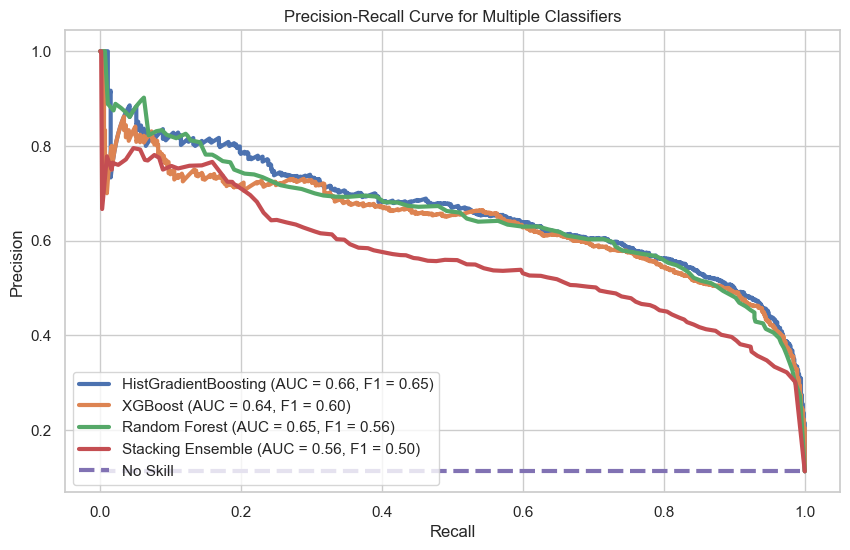

In [73]:
# Initialize a figure for the plot
plt.figure(figsize=(10, 6))
    
# Loop through precision-recall curves and performance metrics
for classifier, precision, recall in precision_recall_curves:
    auc_value = auc(recall, precision)
    f1_score_value = performance_metrics[precision_recall_curves.index((classifier, precision, recall))]['F1-Score']
    
    # Plot precision-recall curve with thicker lines
    plt.plot(recall, precision, label=f'{classifier} (AUC = {auc_value:.2f}, F1 = {f1_score_value:.2f})', linewidth=3)

# Plot No Skill line
no_skill = len(y2_val[y2_val == 1]) / len(y2_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', linewidth=3)

# Axis labels and legend with adjusted position
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')  # Adjust the position of the legend to lower left
plt.title('Precision-Recall Curve for Multiple Classifiers')
plt.grid(True)

plt.show()

In [74]:
from tabulate import tabulate

# Create a DataFrame from the performance_metrics list and round the values to 4 decimal places
metrics_df = pd.DataFrame(performance_metrics)
metrics_df = metrics_df.round(4)  # Round all values to 4 decimal places

# Use tabulate to display the performance metrics table
table = tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False)

# Display the formatted table
print(table)

+----------------------+--------------------------+-----------------------+----------+--------+
|      Classifier      | Precision (Weighted Avg) | Recall (Weighted Avg) | F1-Score |  AUC   |
+----------------------+--------------------------+-----------------------+----------+--------+
| HistGradientBoosting |          0.6621          |        0.6616         |  0.6519  | 0.6616 |
|      XGBoosting      |          0.6383          |        0.6376         |  0.5979  | 0.6376 |
|    Random Forest     |          0.6474          |        0.6506         |  0.5602  | 0.6506 |
|  Stacking Ensemble   |          0.5588          |        0.5621         |  0.5007  | 0.5621 |
+----------------------+--------------------------+-----------------------+----------+--------+


In [78]:
#saving best performing model as pickle model

import pickle 

with open('bankmarketing_model.pkl', 'wb') as file:
    pickle.dump(hgb_classifier, file)

---------------------------------------------------- End of Code. Thank you! --------------------------------------------------